## Section-1: About the Dataset

The **Traffic Crash Reports** dataset records incidents in which the Cincinnati Police Department (CPD) responds to traffic crashes. This data is published daily by the CPD and is accessible from [Cincinnati Open Data Portal](https://data.cincinnati-oh.gov/safety/Traffic-Crash-Reports-CPD-/rvmt-pkmq/about_data). 

When a traffic crash occurs, relevant details are collected through a standardized form, and this information is stored in a database. These reports capture various aspects of the crash, including environmental, human, and infrastructural factors.

---

### Key Factors Influencing Traffic Crashes:
1. **Environmental Conditions**:
   - Rainy weather
   - Ice or snow on the road
2. **Human Behavior**:
   - Negligence (e.g., distracted driving)
   - Fatigue (e.g., dozing off while driving)
   - Impairment (e.g., driving under the influence)
3. **Infrastructural Issues**:
   - Under-construction or poorly maintained roads

---

### Challenges in Forecasting Traffic Crashes:
- Many crashes occur due to **unpredictable circumstances**, such as:
  - A driver falling asleep.
  - Sudden road obstructions.
  - Random human error.
- While some crashes follow **seasonal or weekly patterns** (e.g., accidents during rainy weather), the presence of **unknown variables** makes forecasting complex and less precise.

Below is a preview of the dataset provided by CPD:

In [288]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox

df=pd.read_csv("cpd_crashes.csv")
print(df.head(5))

         date  cpd_crashes
0  2024-01-01           62
1  2024-01-02           69
2  2024-01-03           79
3  2024-01-04           73
4  2024-01-05           87


## Section-2: Exploratory data analysis and transformation

#### Time Series Analysis

The graph below shows the **time series** over the course of 1 year. It highlights:

1. **Significant Peaks**:
   - A noticeable peak occurs during the month of **October**.

2. **Significant Lows**:
   - The data reaches significant lows during the month of **June**.

3. **Unclear Pattern**:
   - Despite some trends, the time series does not exhibit a clear, repeating pattern.



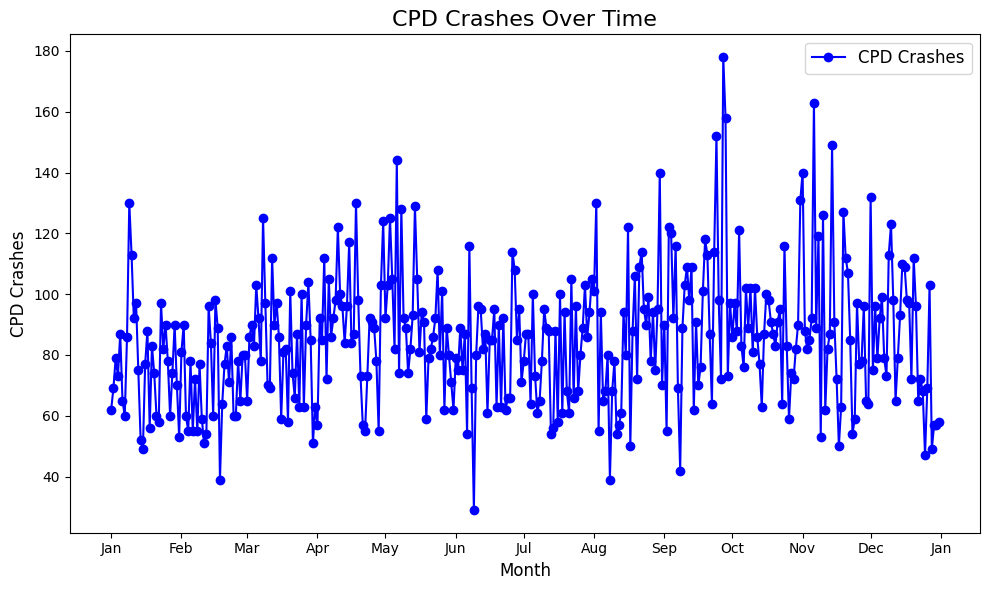

In [289]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(
    df.index,  # Use the default index for the x-axis
    df['cpd_crashes'],
    marker='o',
    linestyle='-',
    color='b',
    label='CPD Crashes'
)

# Format the x-axis to show month names
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Display short month names (e.g., Jan, Feb)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())         # Place ticks at the start of each month

# Add labels and legend
plt.title('CPD Crashes Over Time', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('CPD Crashes', fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

#### Histogram Analysis

The histogram below shows the **distribution of CPD crashes**:

- The distribution is **slightly right-skewed**, indicating that higher crash counts are less frequent but present.
- The tail of the distribution contains some **outliers**, which may represent unusual or extreme events.




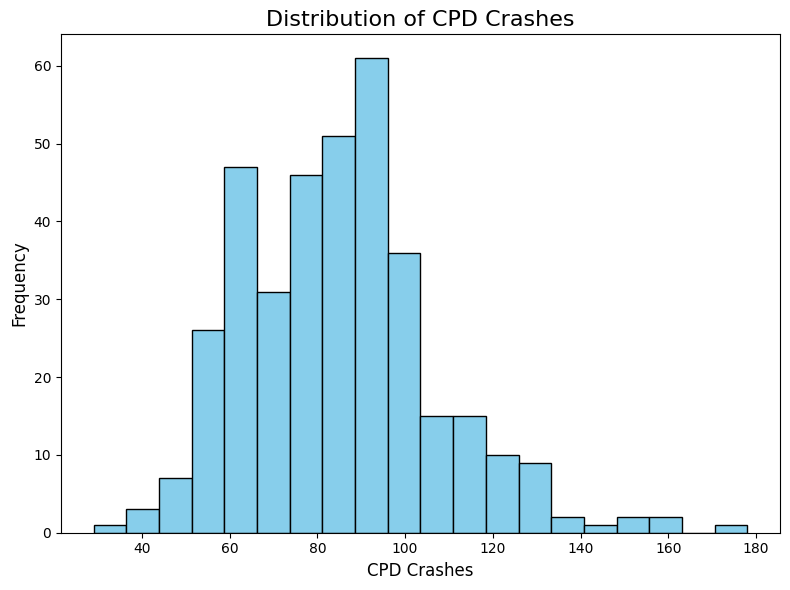

In [290]:
plt.figure(figsize=(8, 6))
plt.hist(df['cpd_crashes'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of CPD Crashes', fontsize=16)
plt.xlabel('CPD Crashes', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

#### Descriptive Statistics and Box Plot

Below are the summary statistics for the "crashes":

- The **mean** and **median** are almost the same, suggesting a relatively symmetric central tendency.
- The **max value** is 178, which appears to be an outlier.
- The **box plot** shows some outliers above 130.
- The **standard deviation** is around 21, resulting in a relatively small box plot.

In [291]:
# Descriptive statistics
summary_stats = df['cpd_crashes'].describe()
print(summary_stats)

count    366.000000
mean      85.021858
std       21.915893
min       29.000000
25%       69.000000
50%       85.000000
75%       97.000000
max      178.000000
Name: cpd_crashes, dtype: float64


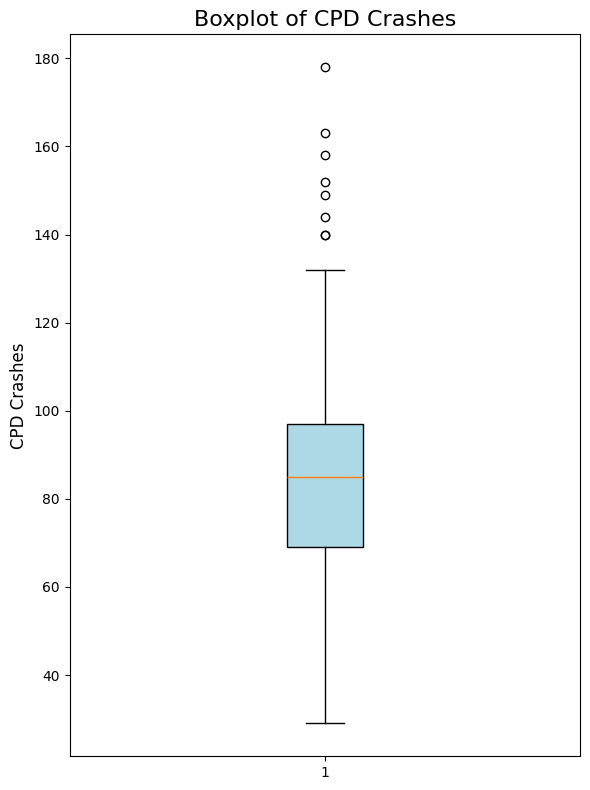

In [292]:
plt.figure(figsize=(6, 8))
plt.boxplot(df['cpd_crashes'], vert=True, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Boxplot of CPD Crashes', fontsize=16)
plt.ylabel('CPD Crashes', fontsize=12)
plt.tight_layout()
plt.show()


#### Violin Plot

The violin plot shows similar information to the box plot but also visualizes the **density distribution** of crashes:

- The **density distribution** provides insights into the concentration of crashes across different ranges.
- Like the box plot, it highlights **outliers** and provides additional context about the spread and shape of the data.

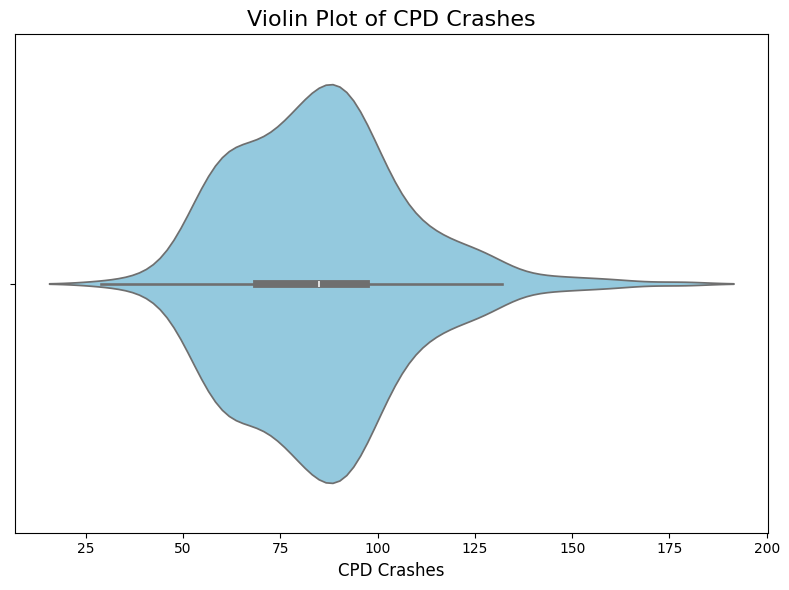

In [293]:
# Create a violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='cpd_crashes', color='skyblue')
plt.title('Violin Plot of CPD Crashes', fontsize=16)
plt.xlabel('CPD Crashes', fontsize=12)
plt.tight_layout()
plt.show()

#### Transformations

Since the distribution is **right-skewed**, various transformations were attempted to normalize the data:

- Transformations such as **log**, **square root**, and **Box-Cox** were applied.
- Despite these efforts, the transformations did not significantly alter the skewness or improve the distribution.

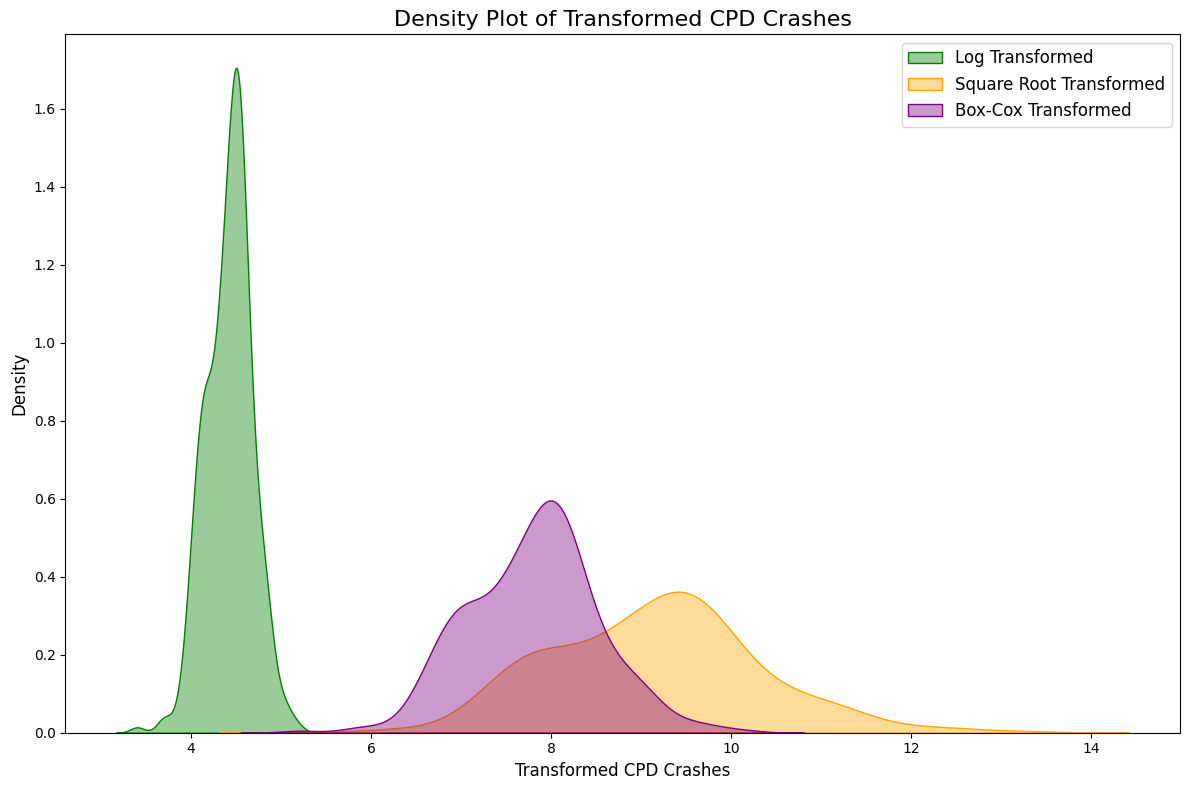

In [294]:
# Apply transformations
df['log_transformed'] = np.log1p(df['cpd_crashes'])  # Log transform (log(x+1) to handle zeros)
df['sqrt_transformed'] = np.sqrt(df['cpd_crashes'])  # Square root transform
df['boxcox_transformed'], _ = boxcox(df['cpd_crashes'] + 1)  # Box-Cox transform (+1 to avoid zeros)

# Density plots for transformed data
plt.figure(figsize=(12, 8))
sns.kdeplot(df['log_transformed'], fill=True, color='green', alpha=0.4, label='Log Transformed')
sns.kdeplot(df['sqrt_transformed'], fill=True, color='orange', alpha=0.4, label='Square Root Transformed')
sns.kdeplot(df['boxcox_transformed'], fill=True, color='purple', alpha=0.4, label='Box-Cox Transformed')
plt.title('Density Plot of Transformed CPD Crashes', fontsize=16)
plt.xlabel('Transformed CPD Crashes', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


## Section-3: Moving Average and Time Series Decomposition

#### Seasonality

To identify **seasonality patterns**, the data was grouped by 7 days (weekly) and 30 days (monthly):

- **Weekly Analysis**:
  - The analysis reveals that **Fridays** have the most accidents.
- **Monthly Analysis**:
  - No significant seasonality was observed in terms of monthly patterns.

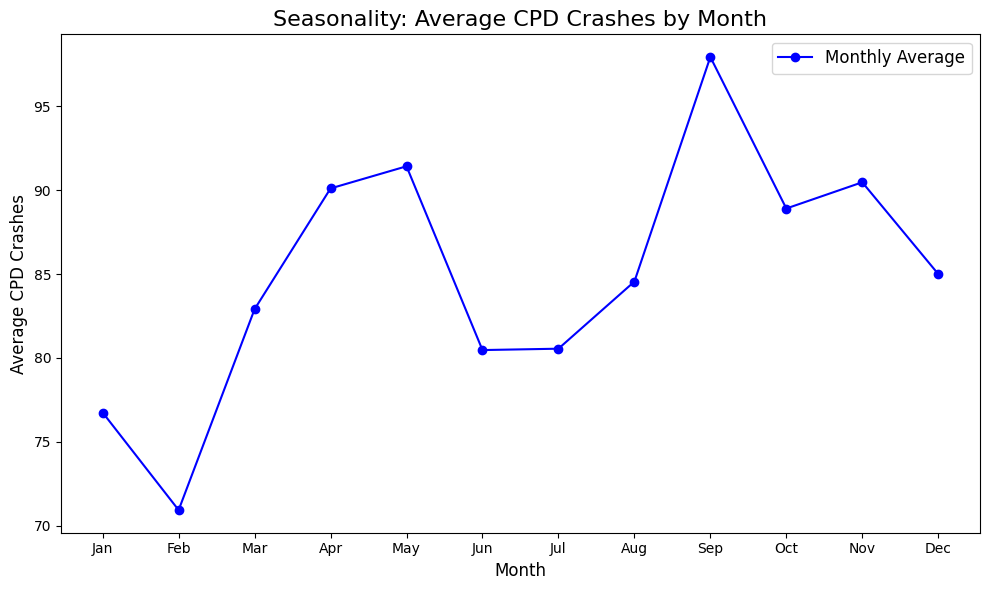

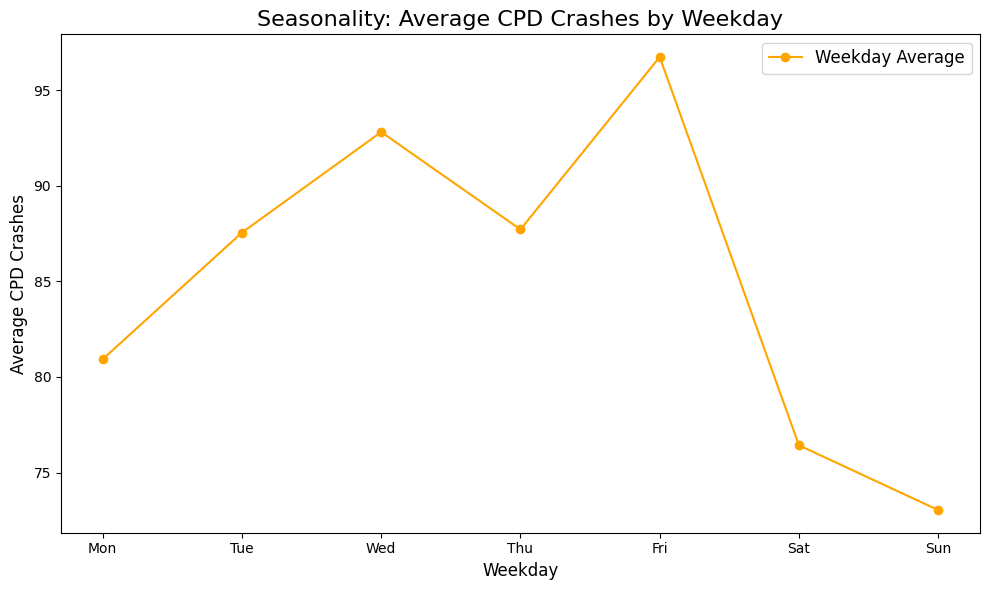

In [295]:

# Extract month and weekday
df['month'] = df.index.month
df['weekday'] = df.index.weekday

# Calculate monthly and weekday averages
monthly_avg = df.groupby('month')['cpd_crashes'].mean()
weekday_avg = df.groupby('weekday')['cpd_crashes'].mean()

# Plot monthly seasonality (line graph)
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg.index, monthly_avg.values, marker='o', linestyle='-', color='blue', label='Monthly Average')
plt.title('Seasonality: Average CPD Crashes by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average CPD Crashes', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# Plot weekday seasonality (line graph)
plt.figure(figsize=(10, 6))
plt.plot(weekday_avg.index, weekday_avg.values, marker='o', linestyle='-', color='orange', label='Weekday Average')
plt.title('Seasonality: Average CPD Crashes by Weekday', fontsize=16)
plt.xlabel('Weekday', fontsize=12)
plt.ylabel('Average CPD Crashes', fontsize=12)
plt.xticks(ticks=range(0, 7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()



#### Moving Average

Performed **simple moving average** for 7 days and 30 days:

- The **7-day moving average** retains the overall trends by normalizing some extreme points.
- The **30-day moving average** significantly smoothens the data, removing much of the noise.
- From the analysis, it appears that there is **no clear seasonality** in the data.


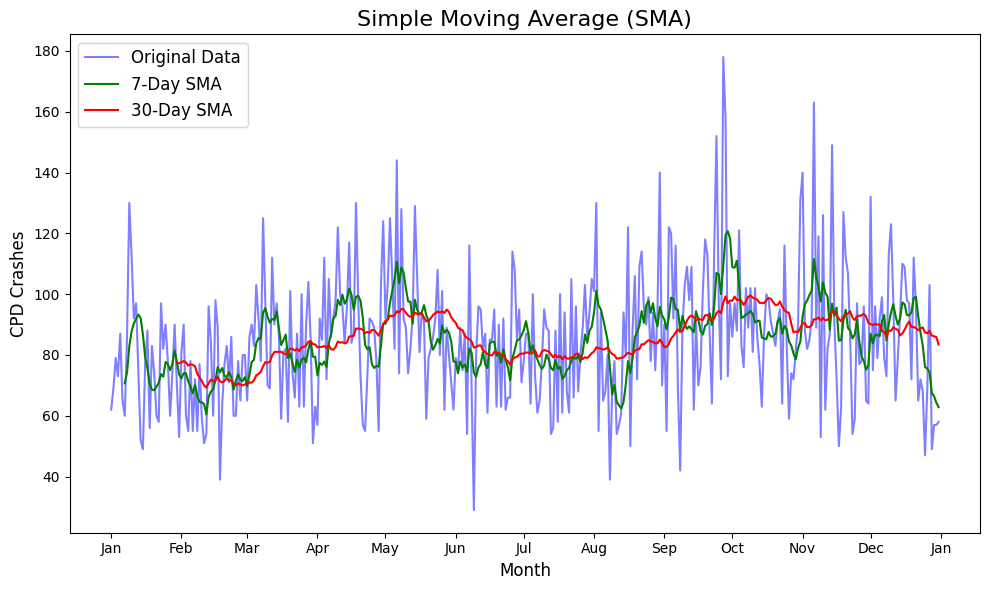

In [296]:
# Apply Simple Moving Average (SMA)
df['SMA_7'] = df['cpd_crashes'].rolling(window=7).mean()  # 7-day moving average
df['SMA_30'] = df['cpd_crashes'].rolling(window=30).mean()  # 30-day moving average

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['cpd_crashes'], label='Original Data', alpha=0.5, color='blue')
plt.plot(df.index, df['SMA_7'], label='7-Day SMA', color='green')
plt.plot(df.index, df['SMA_30'], label='30-Day SMA', color='red')

# Format x-axis to show month names
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Display short month names (e.g., Jan, Feb)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())         # Place ticks at the start of each month

# Add labels, legend, and grid
plt.title('Simple Moving Average (SMA)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('CPD Crashes', fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


#### Remainder Plot

The remainder plot shows that there is still **some trend left** after applying the 7-day simple moving average:

- The **moving average** does not adequately capture or remove the trend from the data.
- This indicates that more sophisticated trend-removal techniques may be necessary.


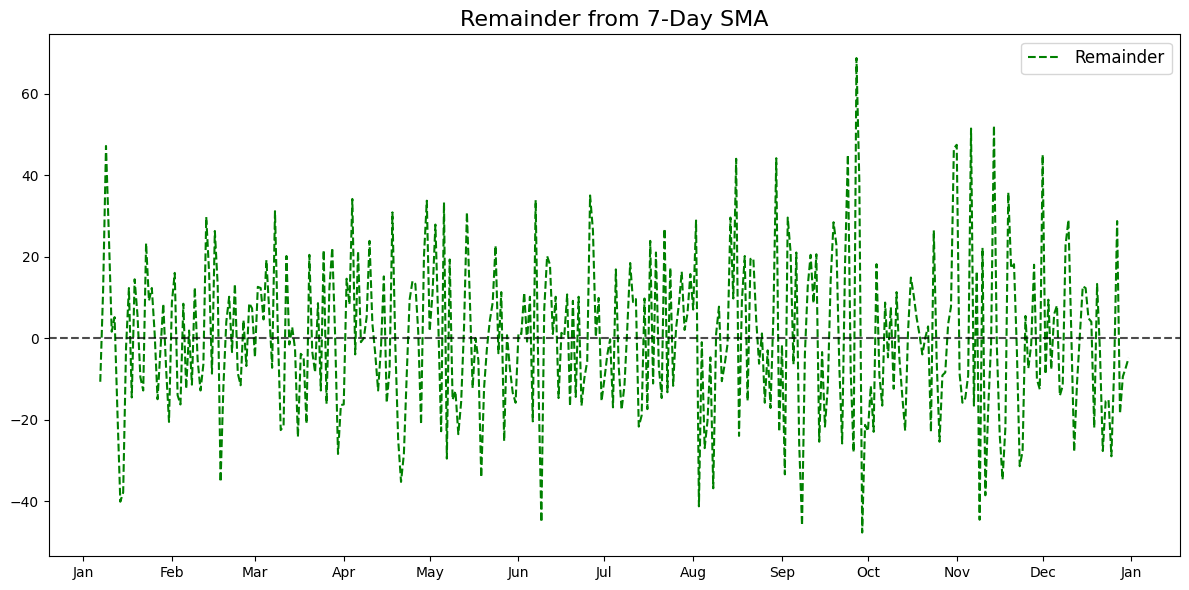

In [297]:
window_size=7
df['remainder'] = df['cpd_crashes'] - df['SMA_7']

# Plot only the remainder
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['remainder'], color='green', linestyle='--', label='Remainder')
plt.axhline(0, color='black', linestyle='--', alpha=0.7)  # Add a horizontal line at 0
plt.title(f'Remainder from {window_size}-Day SMA', fontsize=16)
# Format x-axis to show month names
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Display short month names (e.g., Jan, Feb)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())         # Place ticks at the start of each month
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

#### STL Decomposition

Performed **STL decomposition** using a period of 7 days:

- The **seasonal graph** shows spikes on weekends of each month, indicating weekly seasonality.
- There does not appear to be an **increasing or decreasing trend** in the data over time.

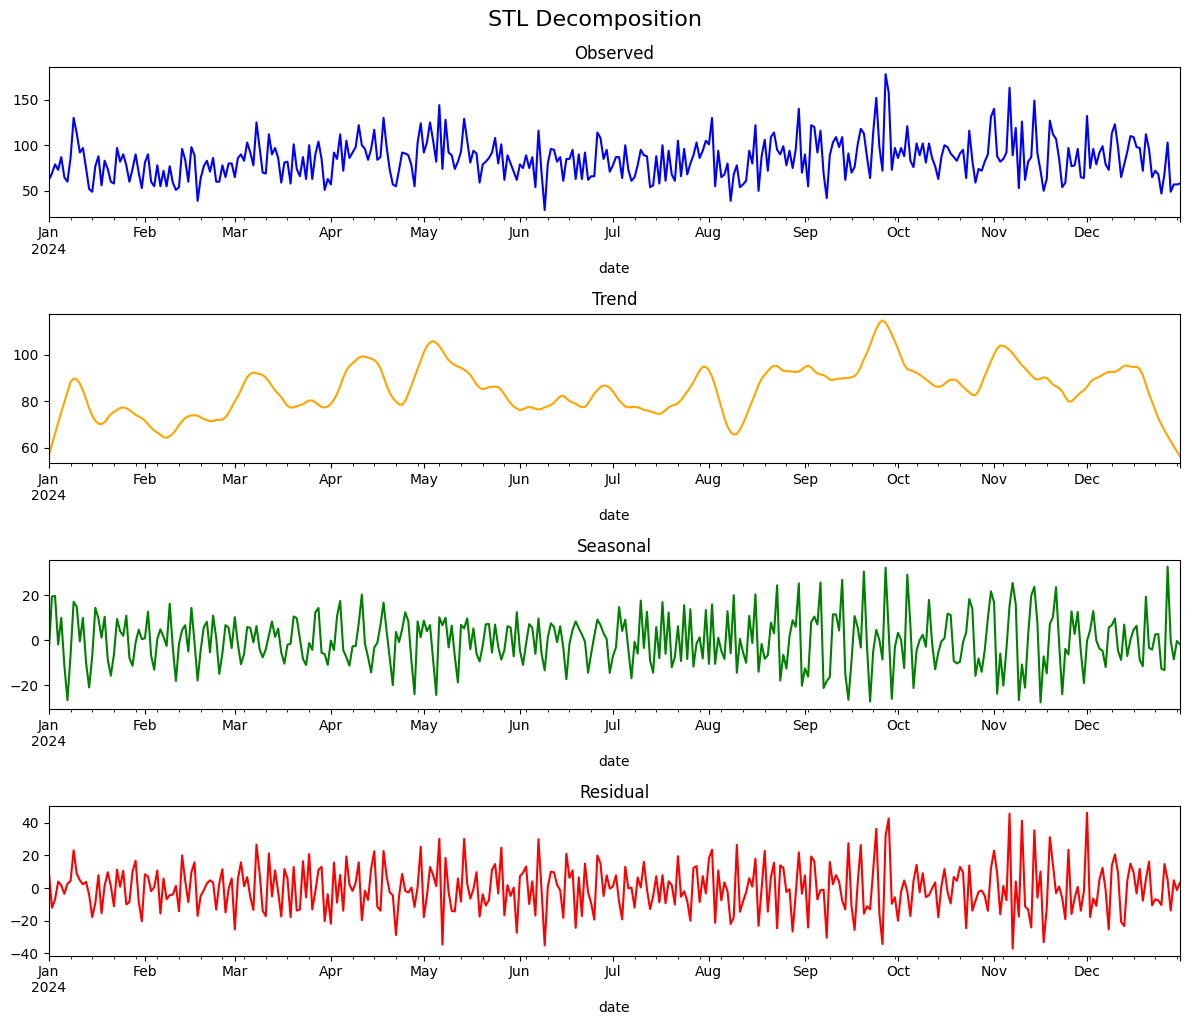

In [298]:
from statsmodels.tsa.seasonal import STL
# Apply STL decomposition
stl = STL(df['cpd_crashes'], period=7)
result = stl.fit()

# Increase plot size
fig, axes = plt.subplots(4, 1, figsize=(12, 10))  # Create subplots with increased size
result.observed.plot(ax=axes[0], title='Observed', color='blue')
result.trend.plot(ax=axes[1], title='Trend', color='orange')
result.seasonal.plot(ax=axes[2], title='Seasonal', color='green')
result.resid.plot(ax=axes[3], title='Residual', color='red')

# Layout adjustments
plt.tight_layout()
plt.suptitle('STL Decomposition', fontsize=16, y=1.02)  # Adjust title position
plt.show()

## Section-4: Naive Forecasting

#### Naive Model

Implemented the **naive model**, which uses the last observed values to predict the next ones:

- The prediction results in a **flat line**, meaning the model does not capture any trends or seasonality.
- This limitation highlights that the naive model is unsuitable for data with patterns or irregularities.

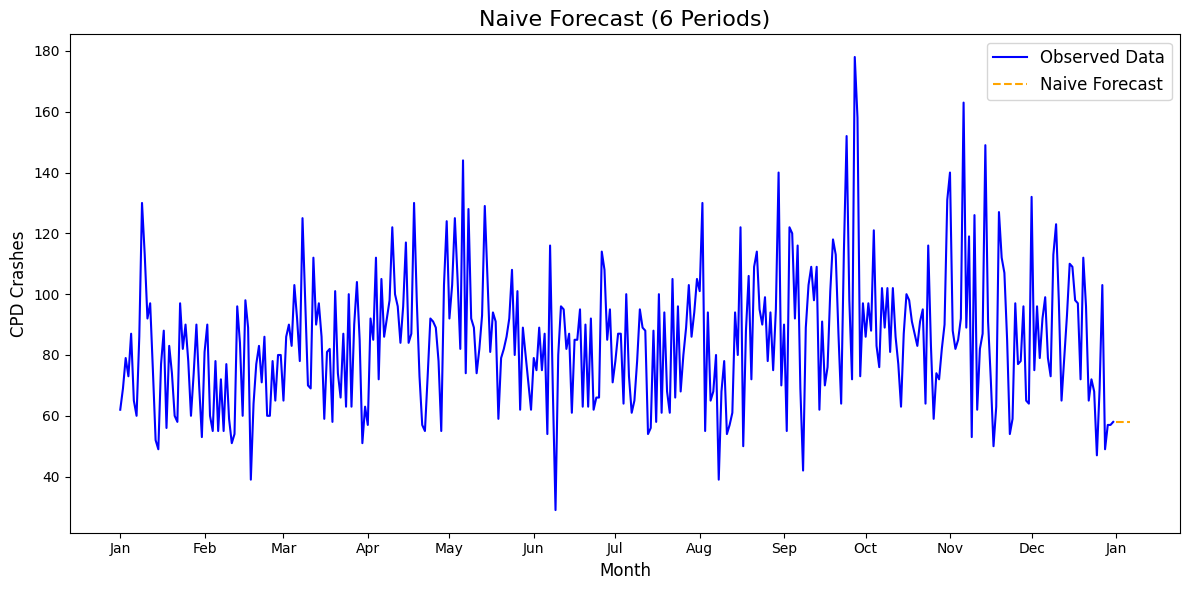

In [299]:
# Conduct Naive Forecast
forecast_periods = 6  # Number of periods to forecast
last_observed_value = df['cpd_crashes'].iloc[-1]  # Last observed value
forecast_values = [last_observed_value] * forecast_periods  # Repeat the last value

# Create a forecast DataFrame
forecast_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=forecast_periods, freq='D')
forecast_df = pd.DataFrame({'date': forecast_dates, 'forecast': forecast_values})
forecast_df.set_index('date', inplace=True)

# Combine observed and forecast data for visualization
combined_df = pd.concat([df, forecast_df.rename(columns={'forecast': 'cpd_crashes'})])

# Plot observed data and Naive Forecast
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['cpd_crashes'], label='Observed Data', color='blue')
plt.plot(forecast_df.index, forecast_df['forecast'], label='Naive Forecast', linestyle='--', color='orange')

# Format x-axis to show month names
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Display short month names (e.g., Jan, Feb)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())         # Place ticks at the start of each month

# Add labels, legend, and grid
plt.title('Naive Forecast (6 Periods)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('CPD Crashes', fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

#### Drift Model

Implemented the **drift model**, which assumes a linear trend based on the first and last observed values:

- The model predicts future values by extending the trend line established by the first and last data points.
- The drift model captures **linear trends** better than the naive model, but it is still limited in handling seasonality or complex patterns.
- While it provides an improvement over the naive model for trend detection, it may not perform well for data with irregular fluctuations or strong seasonal components.

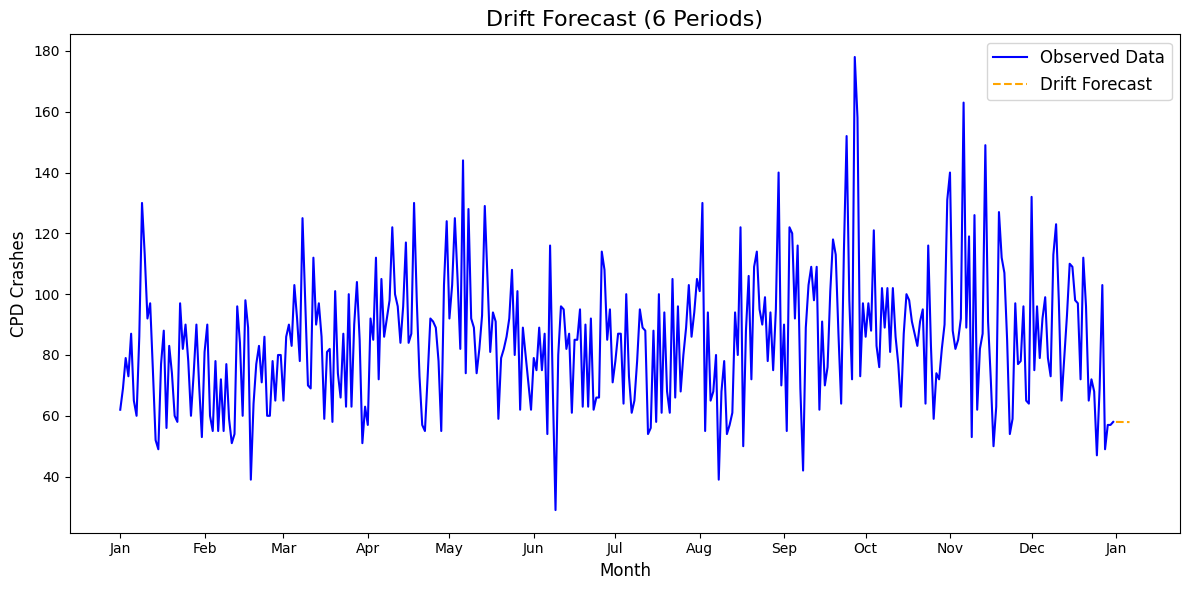

In [300]:
forecast_periods = 6  # Number of future periods to forecast
first_value = df['cpd_crashes'].iloc[0]  # First observed value
last_value = df['cpd_crashes'].iloc[-1]  # Last observed value
n = len(df)  # Total number of observations

# Calculate the drift (slope)
drift = (last_value - first_value) / (n - 1)

# Generate forecast values
forecast_values = [last_value + drift * (i + 1) for i in range(forecast_periods)]

# Create forecast DataFrame
forecast_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=forecast_periods, freq='D')
forecast_df = pd.DataFrame({'date': forecast_dates, 'forecast': forecast_values})
forecast_df.set_index('date', inplace=True)

# Plot observed and forecasted data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['cpd_crashes'], label='Observed Data', color='blue')
plt.plot(forecast_df.index, forecast_df['forecast'], label='Drift Forecast', linestyle='--', color='orange')

# Format x-axis to show month names
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Short month names (e.g., Jan, Feb)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())         # Place ticks at the start of each month

# Add labels and legend (no grid lines)
plt.title('Drift Forecast (6 Periods)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('CPD Crashes', fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

#### Seasonal Naive Model

Implemented the **seasonal naive model**, which uses the last period's values to predict future ones:

- The prediction follows **weekly seasonality**, capturing the pattern of recurring trends effectively.
- Unlike the naive model, the seasonal naive model predicts a **trend line** using seasonal patterns, making it better suited for data with strong seasonality.
- This approach provides a relevant forecast by leveraging the repeating nature of weekly data.

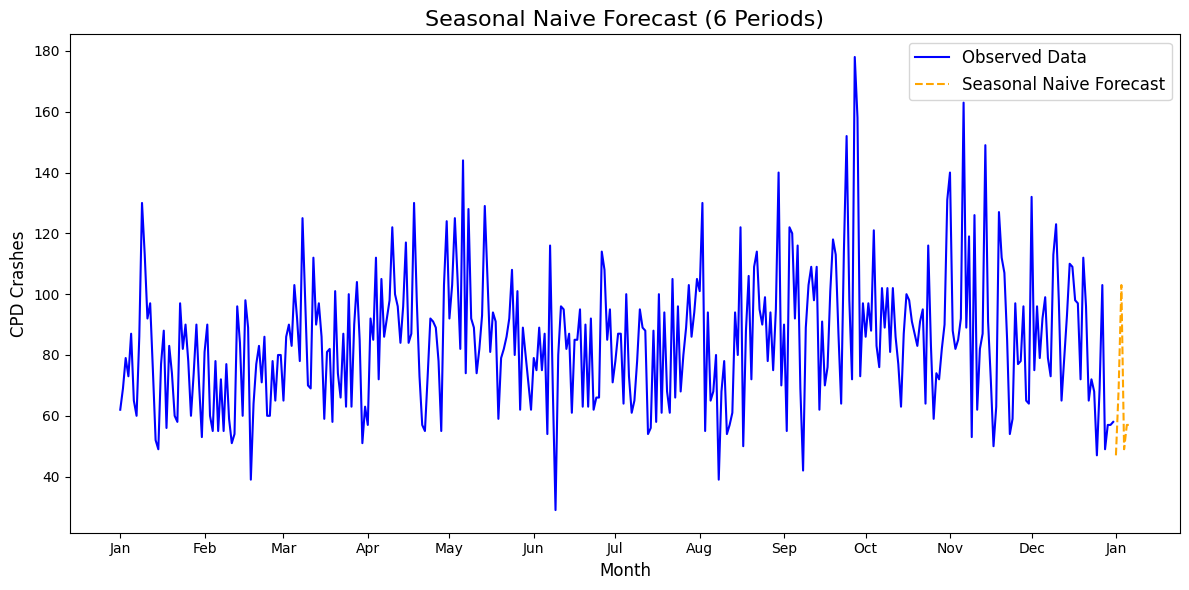

In [301]:
import matplotlib.dates as mdates

# Seasonal naive forecast
seasonal_period = 7  # Assume weekly seasonality
forecast_periods = 6
last_season_values = df['cpd_crashes'].iloc[-seasonal_period:]  # Last season's data
forecast_values = list(last_season_values[:forecast_periods])  # Use the first 6 values

# Create forecast DataFrame
forecast_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=forecast_periods, freq='D')
forecast_df = pd.DataFrame({'date': forecast_dates, 'forecast': forecast_values})
forecast_df.set_index('date', inplace=True)

# Plot observed and forecasted data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['cpd_crashes'], label='Observed Data', color='blue')
plt.plot(forecast_df.index, forecast_df['forecast'], label='Seasonal Naive Forecast', linestyle='--', color='orange')

# Format x-axis to show month names
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Show short month names (e.g., Jan, Feb)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())         # Place ticks at the start of each month

# Labels and legend
plt.title('Seasonal Naive Forecast (6 Periods)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('CPD Crashes', fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


### Conclusion:

The analysis of the CPD crash data reveals the following key insights:

1. **Seasonality**:
   - Weekly patterns are evident, with spikes in crashes on Fridays and weekends, but monthly patterns are less pronounced.

2. **Trend Analysis**:
   - There is no clear increasing or decreasing trend in the data, as confirmed by STL decomposition and remainder plots.

3. **Forecasting Models**:
   - The naive model and drift model fail to account for seasonality, while the seasonal naive model effectively captures weekly patterns.

4. **Data Challenges**:
   - Right-skewed distribution and outliers pose challenges for analysis and forecasting, indicating the need for robust techniques to address non-normality.